In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install spacy


   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
    --------------------------------------- 0.3/11.7 MB ? eta -:--:--
    --------------------------------------- 0.3/11.7 MB ? eta -:--:--
    --------------------------------------- 0.3/11.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.7 MB 509.0 kB/s eta 0:00:22
   - -------------------------------------- 0.5/11.7 MB 509.0 kB/s eta 0:00:22
   -- ------------------------------------- 0.8/11.7 MB 524.3 kB/s eta 0:00:21
   --- ------------------------------------ 1.0/11.7 MB 484.0 kB/s eta 0:00:23
   ---- ----------------------------------- 1.3/11.7 MB 559.2 kB/s eta 0:00:19
   ---- ----------------------------------- 1.3/11.7 MB 559.2 kB/s eta 0:00:19
   ----- ---------------------------------- 1.6/11.7 MB 582.5 kB/s eta 0:00:18
   ----- ------------------

In [4]:
python -m spacy download en_core_web_sm


SyntaxError: invalid syntax (1553972540.py, line 1)

In [ ]:
import spacy

# Load the language model
nlp = spacy.load('en_core_web_sm')

# Test with a sample text
doc = nlp("This is a test sentence.")
for token in doc:
    print(token.text, token.pos_, token.dep_)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')

In [6]:
imdb_data=pd.read_csv(r"C:\Users\amree\Downloads\IMDB Dataset.csv")
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [7]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
imdb_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [9]:
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [13]:
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

In [11]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [12]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

# Initialize the tokenizer
tokenizer = ToktokTokenizer()

# Ensure you have stopwords
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

<>:7: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\['
C:\Users\amree\AppData\Local\Temp\ipykernel_33028\2936650594.py:7: SyntaxWarning: invalid escape sequence '\['
  return re.sub('\[[^]]*\]', '', text)


In [18]:
import re

def clean_text(text):
    # Use raw string to avoid invalid escape sequence warning
    return re.sub(r'\[[^]]*\]', '', text)


In [20]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [21]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [22]:
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'doing', 'until', 'haven', 'mustn', 'its', 'with', 'mightn', 'wouldn', 'who', 'hers', "you've", 'as', 'to', 'very', "that'll", "hasn't", "you're", 'yourself', 'herself', 'few', "you'd", "couldn't", 'yourselves', 'were', 'isn', 's', 'he', 'had', 'do', 'it', "wouldn't", "don't", 'then', 'this', 'should', 'won', 'what', 'me', 'i', 'are', 'did', 'against', 'other', 'for', "you'll", 'my', 'just', 'those', 'off', 'which', 'the', 'his', 'whom', 't', 'aren', 'ours', 'is', "isn't", 'ma', 'an', 'than', 'of', 'such', "it's", 'up', 'no', 'that', 'themselves', 'through', 'most', 'been', 'll', 'itself', 'by', 'during', 'own', 'them', 'she', 'our', 'under', "haven't", 'and', 'can', 'ourselves', 'between', 'these', 'didn', 'so', 'below', 'o', "wasn't", "weren't", 'having', 'd', 'have', 'nor', 'does', 'but', 're', "should've", 'doesn', 'why', 'be', 'when', "she's", 'into', 'each', 'being', 'out', 'shouldn', 'now', 'your', 'a', 'you', 'again', 'ain', 'above', "won't", 'some', 'we', 'because', 'there', 

In [23]:
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focu mainli emerald citi experi section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injust crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi wat

In [52]:
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi el didnt think thi appallingli unfunni montag wasnt acm humour 70 ind ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becau wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becau wa lower scoreand onl

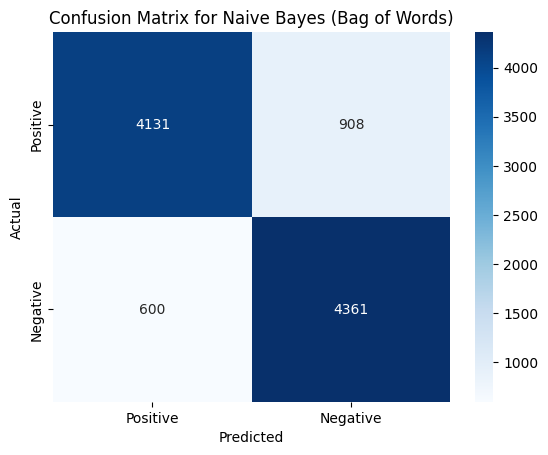

Accuracy score (Bag of Words): 0.8492
Classification Report (Bag of Words):
              precision    recall  f1-score   support

    Negative       0.83      0.88      0.85      4961
    Positive       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Precision (Bag of Words): 0.87
Recall (Bag of Words): 0.82


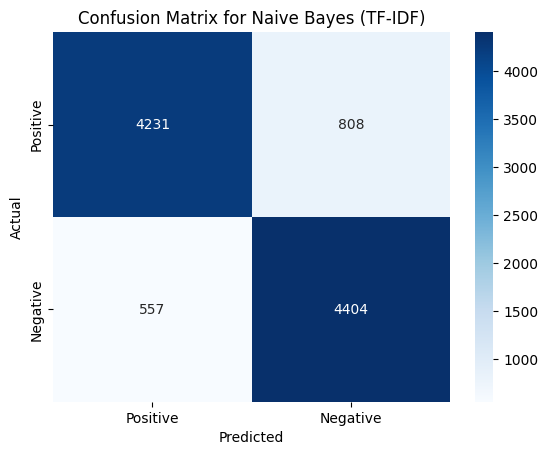

Accuracy score (TF-IDF): 0.8635
Classification Report (TF-IDF):
              precision    recall  f1-score   support

    Negative       0.84      0.89      0.87      4961
    Positive       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Precision (TF-IDF): 0.88
Recall (TF-IDF): 0.84


In [54]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (make sure the file path is correct)
df = pd.read_csv(r"C:\Users\amree\Downloads\IMDB Dataset.csv")

# Define the features and labels
X = df['review']  # text reviews
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # convert sentiment to binary (1 for positive, 0 for negative)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer to transform the text into Bag of Words features
vectorizer_bow = CountVectorizer()

# Fit and transform the training data for Bag of Words
cv_train_reviews = vectorizer_bow.fit_transform(X_train)

# Transform the test data for Bag of Words
cv_test_reviews = vectorizer_bow.transform(X_test)

# Initialize and fit the Multinomial Naive Bayes model with Bag of Words features
mnb = MultinomialNB()
mnb_bow = mnb.fit(cv_train_reviews, y_train)

# Make predictions on the test set using Bag of Words features
mnb_bow_predict = mnb.predict(cv_test_reviews)

# Compute and visualize the confusion matrix for Bag of Words
cm_bow = confusion_matrix(y_test, mnb_bow_predict, labels=[1, 0])
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes (Bag of Words)')
plt.show()

# Calculate and print the accuracy score for Bag of Words
mnb_bow_score = accuracy_score(y_test, mnb_bow_predict)
print("Accuracy score (Bag of Words):", mnb_bow_score)

# Generate and print the classification report for Bag of Words
mnb_bow_report = classification_report(y_test, mnb_bow_predict, target_names=['Negative', 'Positive'])
print("Classification Report (Bag of Words):")
print(mnb_bow_report)

# Manually calculate precision and recall for Bag of Words
precision_bow = precision_score(y_test, mnb_bow_predict)
recall_bow = recall_score(y_test, mnb_bow_predict)
print(f"Precision (Bag of Words): {precision_bow:.2f}")
print(f"Recall (Bag of Words): {recall_bow:.2f}")

# Create a TfidfVectorizer to transform the text into TF-IDF features
vectorizer_tfidf = TfidfVectorizer()

# Fit and transform the training data for TF-IDF
tv_train_reviews = vectorizer_tfidf.fit_transform(X_train)

# Transform the test data for TF-IDF
tv_test_reviews = vectorizer_tfidf.transform(X_test)

# Initialize and fit the Multinomial Naive Bayes model with TF-IDF features
mnb_tfidf = MultinomialNB()
mnb_tfidf = mnb_tfidf.fit(tv_train_reviews, y_train)

# Make predictions on the test set using TF-IDF features
mnb_tfidf_predict = mnb_tfidf.predict(tv_test_reviews)

# Compute and visualize the confusion matrix for TF-IDF
cm_tfidf = confusion_matrix(y_test, mnb_tfidf_predict, labels=[1, 0])
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes (TF-IDF)')
plt.show()

# Calculate and print the accuracy score for TF-IDF
mnb_tfidf_score = accuracy_score(y_test, mnb_tfidf_predict)
print("Accuracy score (TF-IDF):", mnb_tfidf_score)

# Generate and print the classification report for TF-IDF
mnb_tfidf_report = classification_report(y_test, mnb_tfidf_predict, target_names=['Negative', 'Positive'])
print("Classification Report (TF-IDF):")
print(mnb_tfidf_report)

# Manually calculate precision and recall for TF-IDF
precision_tfidf = precision_score(y_test, mnb_tfidf_predict)
recall_tfidf = recall_score(y_test, mnb_tfidf_predict)
print(f"Precision (TF-IDF): {precision_tfidf:.2f}")
print(f"Recall (TF-IDF): {recall_tfidf:.2f}")


<function matplotlib.pyplot.show(close=None, block=None)>

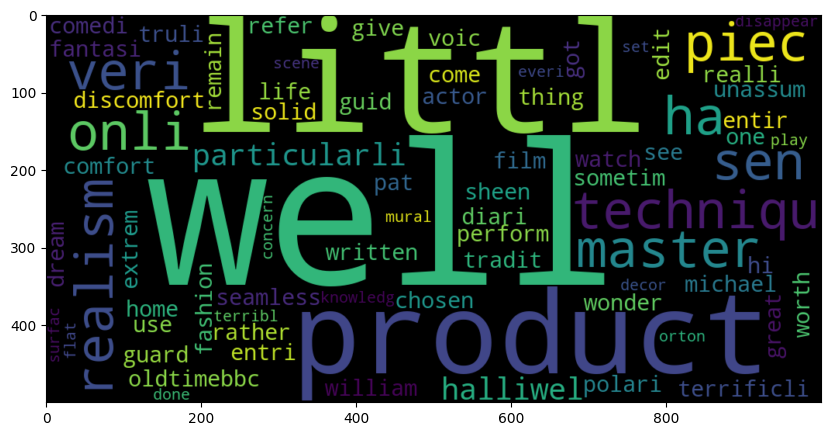

In [55]:
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

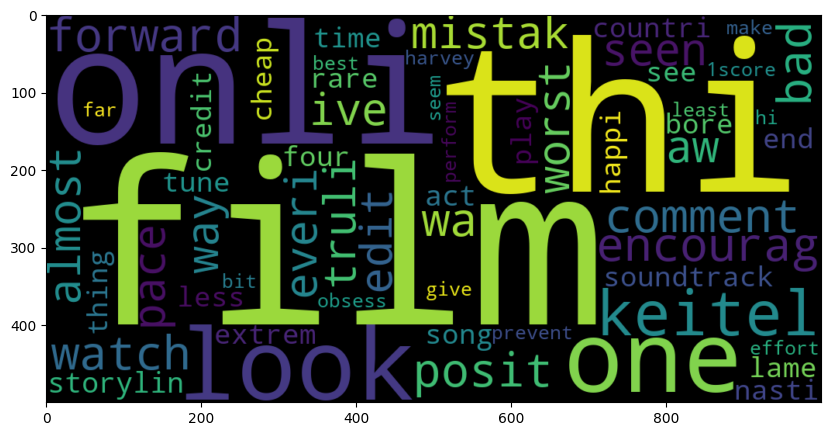

In [56]:
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show